In [1]:
from uarray.visualize import visualize_expression

# Simple Matchpy Expression

In [2]:
import matchpy

class Int(matchpy.Symbol):
    pass

class Nil(matchpy.Operation):
    name = "Nil"
    arity = matchpy.Arity(0, True)

class Cons(matchpy.Operation):
    """
    Cons(value, list)
    """
    name = "Cons"
    arity = matchpy.Arity(2, True)

class List(matchpy.Operation):
    """
    List(*values)
    """
    name = "List"
    arity = matchpy.Arity(0, False)

In [3]:
a_list = List(Int(1), Int(2))
a_list

List(Int(1), Int(2))


# Visualize MatchPy Expression

`visualize_expression(expression, with_attr=True)`

If `with_attr` is false the graphviz nodes will not be styled. Any matchpy inherited class that implements `_gviz_node_attr_(self)` will be able to supply a custom description and attributes for styling.

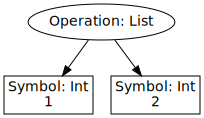

In [4]:
visualize_expression(a_list)

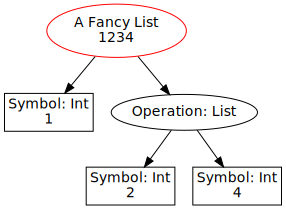

In [5]:
class FancyList(matchpy.Operation):
    def _repr_gviz_node_(self):
        return (
            'A Fancy List\n1234',
            {'color': 'red'}
        )
    
visualize_expression(FancyList(Int(1), List(Int(2), Int(4))))

# uarray Visualization

This visualization expression has been configured specifically for uarray expressions. We do some cleanup becuase for visualization the whole tree does not entirely mater. For example `Unbound(variable_name="B") -> NDArray\nB`. `Sequence(Int(2), ...)` -> `NDArray\nB <1 3>`.

In [9]:
from uarray import moa, core

# (A^< 4 5 > + B) * (<1 2> phi C)
moa_expr = moa.Multiply(moa.Add(core.with_shape(core.unbound('A'), core.vector(4, 5)), core.unbound('B')), moa.Index(core.vector(1, 2), core.unbound('C')))
moa_expr

Multiply(
    Add(
        Sequence(
            Int(2),
            UnaryFunction(
                Sequence(
                    VectorCallable(Scalar(Int(4)), Scalar(Int(5))),
                    UnaryFunction(
                        Scalar(
                            Content(
                                CallUnary(
                                    GetItem(
                                        CallUnary(GetItem(Unbound(variable_name="A")), Unbound(variable_name="i4"))
                                    ),
                                    Unbound(variable_name="i5"),
                                )
                            )
                        ),
                        Unbound(variable_name="i5"),
                    ),
                ),
                Unbound(variable_name="i4"),
            ),
        ),
        Unbound(variable_name="B"),
    ),
    Index(Sequence(Int(2), VectorCallable(Scalar(Int(1)), Scalar(Int(2)))), Unbound(variable_name="C")),
)


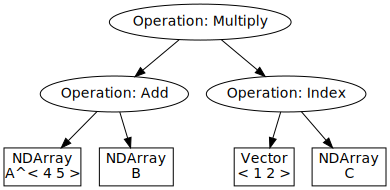

In [7]:
visualize_expression(moa_expr)

# Now we display entire structure

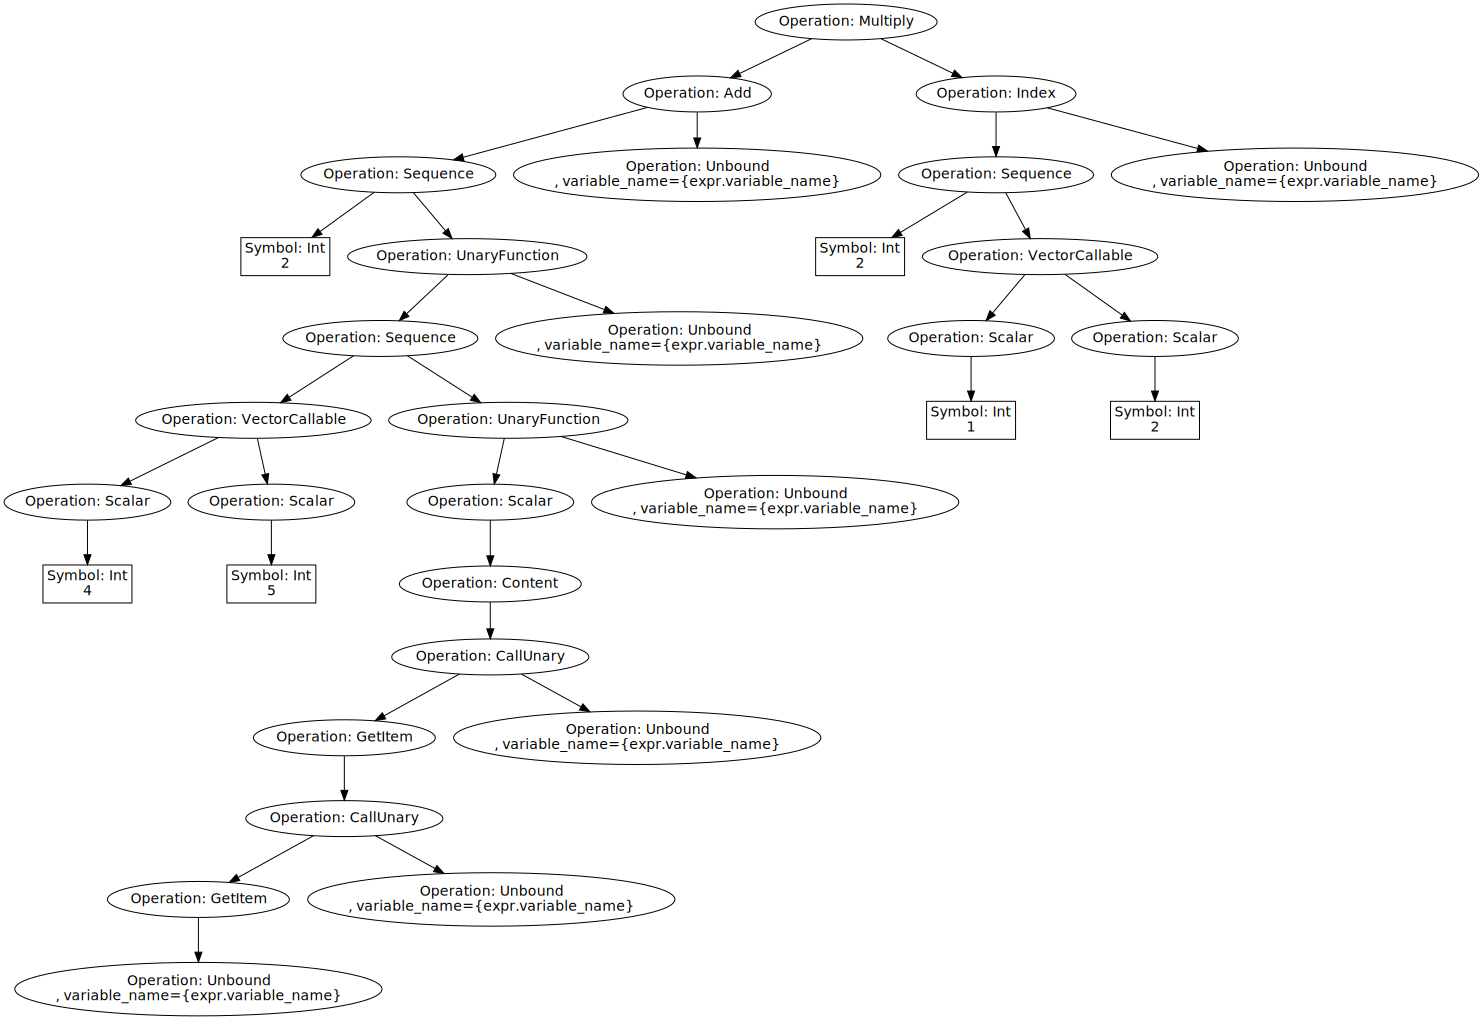

In [8]:
visualize_expression(moa_expr, with_uarray=False)